# Titanic and Lusitania Data Mining

##### Description of the data:

Titanic DataFrame: info on 1309 Passengers Only 

<pre>
```

| pclass    | Passenger Class | 1~upper 2~middle 3~lower                  |
|:---------:|:---------------:|:-----------------------------------------:|
| survived  | Survival        | 1=survived 0=deceased                     |
| sex       | Female or Male  |                                           |
| age       | Age in years    | fractional if less than 1                 |
| sibsp     | Number          | siblings and spouses on board             |
| parch     | Number          | parents and children on board             |
| ticket    | Ticket Number   |                                           |
| fare      | Ticket Fare     |                                           |
| cabin     | Number          |                                           |
| embarked  | Port Embarked   | C: Cherbourg Q: Queenstown S: Southampton |
| boat      | Lifeboat ID     |                                           |
| body      | Body ID Number  |                                           |
| home.dest | Destination     |                                           |



```
</pre>

Lusitania DataFrame: info on 1961 Passengers and Crews 
info entails: 
'Family name': Last Name 
'Title': Title 
'Personal name': First Name 
'Fate': Survaival Lost or Saved 
'Age': Age in years Children under 2 in -months and Infants 
'Department/Class': Crew Department Passenger Class Band Deck Engineering Victualling Stowaway
Saloon=1st Class Second Class Third Class
'Passenger/Crew': Passenger or Crew 
'Citizenship': Citizen Country 
'Position': Position of Crew Member
'Status': Marital Status 
'City': City of origin 
'County': County of origin 
'State': State of origin 
'Country': Country of origin 
'Lifeboat': Lifeboat 
'Rescue Vessel': Rescue Vessel 
'Body No.': Body Identification Number 
'Ticket No.': Ticket Identification Number 
'Cabin No.': Cabin Number 
'Traveling Companions and other notes': Traveling Companions 
'Value': Corrosponds to Fate 0=NO 1=YES 
'Adult/Minor': Age < 18 Minor => 18 Adult 
'Sex': Male/Female

#### Based on our conceptual understanding of the columns in this data set.  What are the reasonable range of the values for the Sex, Age, SibSp, Parch columns.

In [ ]:
Sex = Male/Female Age = 0 to 100 SibSp = 0 to 10 ParCh = 0 to 10


### Open the data in sublime text is there anything that jumps out to you?

In [ ]:
Lusitania has much more information than Titanic. Lusitania looks more like raw data.


## Part 2: reading the data in

#### Now read the data into a Pandas DataFrame

In [38]:
import pandas as pd
import numpy as np
import re
import math
from scipy.stats import chi2_contingency
from collections import OrderedDict

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
titanic = pd.read_csv('../data/titanic.csv')
lusit = pd.read_csv('../data/lusitania.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [4]:
lusit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 23 columns):
Family name                             1961 non-null object
Title                                   1961 non-null object
Personal name                           1958 non-null object
Fate                                    1961 non-null object
Age                                     1308 non-null object
Department/Class                        1961 non-null object
Passenger/Crew                          1961 non-null object
Citizenship                             1959 non-null object
Position                                691 non-null object
Status                                  795 non-null object
City                                    1279 non-null object
County                                  71 non-null object
State                                   1032 non-null object
Country                                 1323 non-null object
Lifeboat                                132

#### Check that the age column doesn't have any unreasonable values 

In [5]:
titanic['age'].unique()

array([ 29.  ,   0.92,   2.  ,  30.  ,  25.  ,  48.  ,  63.  ,  39.  ,
        53.  ,  71.  ,  47.  ,  18.  ,  24.  ,  26.  ,  80.  ,    nan,
        50.  ,  32.  ,  36.  ,  37.  ,  42.  ,  19.  ,  35.  ,  28.  ,
        45.  ,  40.  ,  58.  ,  22.  ,  41.  ,  44.  ,  59.  ,  60.  ,
        33.  ,  17.  ,  11.  ,  14.  ,  49.  ,  76.  ,  46.  ,  27.  ,
        64.  ,  55.  ,  70.  ,  38.  ,  51.  ,  31.  ,   4.  ,  54.  ,
        23.  ,  43.  ,  52.  ,  16.  ,  32.5 ,  21.  ,  15.  ,  65.  ,
        28.5 ,  45.5 ,  56.  ,  13.  ,  61.  ,  34.  ,   6.  ,  57.  ,
        62.  ,  67.  ,   1.  ,  12.  ,  20.  ,   0.83,   8.  ,   0.67,
         7.  ,   3.  ,  36.5 ,  18.5 ,   5.  ,  66.  ,   9.  ,   0.75,
        70.5 ,  22.5 ,   0.33,   0.17,  40.5 ,  10.  ,  23.5 ,  34.5 ,
        20.5 ,  30.5 ,  55.5 ,  38.5 ,  14.5 ,  24.5 ,  60.5 ,  74.  ,
         0.42,  11.5 ,  26.5 ])

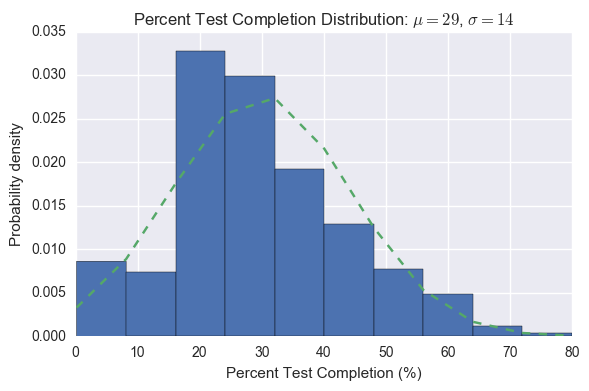

In [6]:
mu = np.mean(titanic['age'])
sigma = np.std(titanic['age'])
x = mu + sigma * np.random.randn(700)

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(titanic['age'].dropna(), normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Percent Test Completion (%)')
ax.set_ylabel('Probability density')
ax.set_title(r'Percent Test Completion Distribution: $\mu=%d$, $\sigma=%d$' %(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid(True)

plt.show()

In [7]:
lusit['Age'].unique()

array(['38', '37', '30', '25', '27', '48', nan, '24', '19 ?', '57', '50',
       '56', '41', '19', '33', '29', '18', '20', '21', '26', '17', '58',
       '47', '54', '35', '43', '59', '53', '44', '51', '40', '49', '42',
       '32', '31', '34', '22', '45', '36', '29 ?', '52', '23', '60', '28',
       '16', '46', '15', '39', '63 ?', '55', '64', '53 ?', '09-months',
       '6', '9', '14', '10', '12', '?', '62', '5', '8', '65', '68', '76',
       '61', '63', '03-months', '1.5', '2.5', '18-months', '3', '2',
       '25 ?', '08-months', '4', '15-months', '14-months', 'Infant',
       '3-6-months ?', '51 or 47', '45 or 51', '22 (?)', '17-months',
       '13-months', '02-months', '49 ?', '05-months', '11', '59 (64?)',
       '63 (51?)', '37 (39?)', '32 (22?)', '31 (32?)', '24 (23?)', '27?',
       '7', '42?', '31 ?', '10-months', '38 (?)', '70', '62 (?)',
       '06-months', '13', '2_', '11-months', '30 ?', '34?', '1',
       '39 (47?)', '67', '73', '72', '11-months (3?)', '4.25', '69', '26?'

In [8]:
def clean_lusitAge(row):
    regex = r"(\d+)(\?)"
    
    if type(row) == str and "-" in row:
        row = round(float(row.split("-")[0])/12, 2)
    
    if type(row) == str:
        row = row.split(" ")[0]
        row = row.replace("Infant", "0.08").replace("_", "")
        row = re.sub(regex, r"\1", row)
        row = np.where(row == '?', 0, row)
        
    return row

In [9]:
lusit['Age'] = lusit['Age'].apply(clean_lusitAge)

In [10]:
lusit['Age'] = lusit['Age'].astype(float)

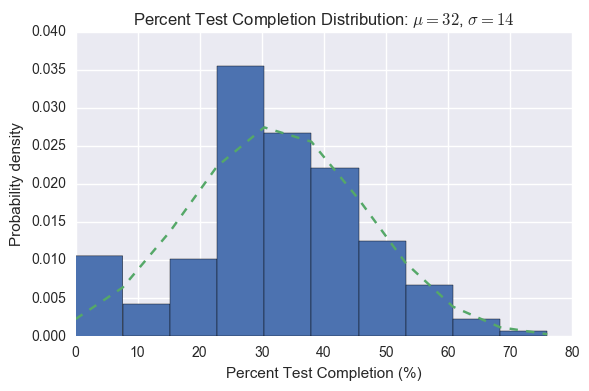

In [11]:
mu = np.mean(lusit['Age'])
sigma = np.std(lusit['Age'])
x = mu + sigma * np.random.randn(700)

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(lusit['Age'].dropna(), normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Percent Test Completion (%)')
ax.set_ylabel('Probability density')
ax.set_title(r'Percent Test Completion Distribution: $\mu=%d$, $\sigma=%d$' %(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid(True)

plt.show()

## Part 3: data imputation

#### Well let’s say that it does... You likely noticed that Age has some missing values. How many are missing?

In [12]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
titanic.columns = [col.replace(".", "_") for col in titanic.columns]

In [14]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [122]:
titanic['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22',
       'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20',
       'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

Feature Engineering – Creating new variables

Titles reflect social status and may predict survival probability

Extract Cabin category information from the Cabin number

In [15]:
def extract_titanicTitle(row):
    pattern = re.compile("(, .+?\.)")
    row = pattern.findall(row)
    row = row[0].replace(", ", "")        
    
    return row

In [16]:
titanic["title"] = titanic["name"].apply(extract_titanicTitle)

In [17]:
titanicAge_dict = titanic.groupby(['title'])['age'].mean().to_dict()

In [18]:
def fill_titanicAge(row):
    global titanicAge_dict
    age = row['age']
    title = row['title']
    if math.isnan(age):
        if title in titanicAge_dict.keys():
            return titanicAge_dict[title]
    else:
        return age

In [19]:
titanic['age'] = titanic.apply(fill_titanicAge, axis=1)

In [20]:
lusit.isnull().sum()

Family name                                0
Title                                      0
Personal name                              3
Fate                                       0
Age                                      653
Department/Class                           0
Passenger/Crew                             0
Citizenship                                2
Position                                1270
Status                                  1166
City                                     682
County                                  1890
State                                    929
Country                                  638
Lifeboat                                1829
Rescue Vessel                           1810
Body No.                                1750
Ticket No.                              1677
Cabin No.                               1632
Traveling Companions and other notes    1363
Value                                      0
Adult/Minor                                0
Sex       

In [21]:
lusit.columns = [col.lower().replace(" ", "_").replace("/", "_") for col in lusit.columns]

In [22]:
def clean_lusitTitle(row):
    row = row.replace("Mr. (later Sir)", "Sir")
    row = row.replace("Master (?)", "Master")
    row = "".join(row.split(" "))   
    
    return row

In [23]:
lusit["title"] = lusit["title"].apply(clean_lusitTitle)

In [24]:
lusitAge_dict = lusit.groupby(['title'])['age'].mean().to_dict()

In [25]:
def fill_lusitAge(row):
    global lusitAge_dict
    age = row['age']
    title = row['title']
    if math.isnan(age):
        if title in lusitAge_dict.keys():
            return lusitAge_dict[title]
    else:
        return age

In [26]:
lusit["age"] = lusit.apply(fill_lusitAge, axis=1)

In [27]:
titanic['life'] = titanic['survived'].apply(lambda x: 'survived' if x == 1 else 'deceased')

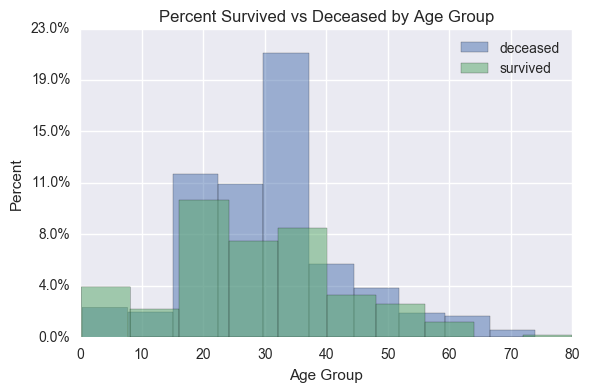

In [28]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations
    s = str(round(y/1309.0*100))

    # The percent symbol needs escaping in latex
    if plt.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

fig, ax = plt.subplots()

# the histogram of the data
titanic.groupby(['life'])['age'].plot.hist(alpha=0.5, ax=ax, legend = True)

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

ax.set_xlabel('Age Group')
ax.set_ylabel('Percent')
ax.set_title('Percent Survived vs Deceased by Age Group')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid(True)

plt.show()

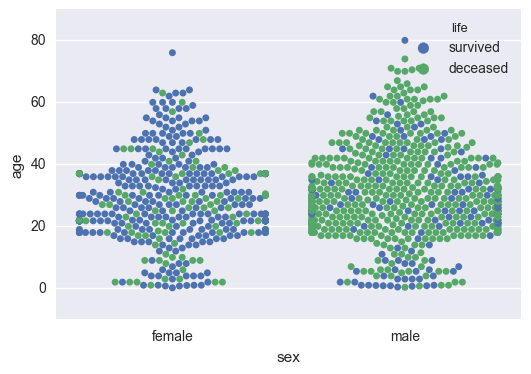

In [30]:
sns.swarmplot(x="sex", y="age", hue="life", data=titanic)

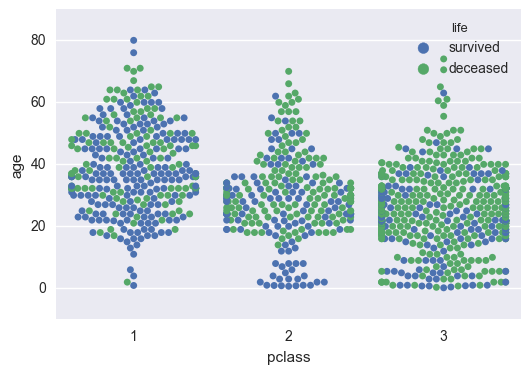

In [31]:
sns.swarmplot(x="pclass", y="age", hue="life", data=titanic)

In [32]:
titanic['deceased'] = titanic['survived'].apply(lambda x: 1 if x == 0 else 0)
titanic['all'] = titanic['survived'] + titanic['deceased']
titanic['survival_rate'] = titanic['survived']/titanic['all']

titanic.groupby(['pclass','sex']).agg(OrderedDict([('deceased', 'sum'),
                                                              ('survived', 'sum'),
                                                              ('all', 'sum'),
                                                              ('survival_rate', 'mean')]))

deceased  survived  all  survival_rate
pclass sex                                           
1      female         5       139  144       0.965278
       male         118        61  179       0.340782
2      female        12        94  106       0.886792
       male         146        25  171       0.146199
3      female       110       106  216       0.490741
       male         418        75  493       0.152130

In [33]:
titanic.groupby(['pclass','sex','embarked']).agg(OrderedDict([('deceased', 'sum'),
                                                              ('survived', 'sum'),
                                                              ('all', 'sum'),
                                                              ('survival_rate', 'mean')]))

deceased  survived  all  survival_rate
pclass sex    embarked                                        
1      female C                2        69   71       0.971831
              Q                0         2    2       1.000000
              S                3        66   69       0.956522
       male   C               42        28   70       0.400000
              Q                1         0    1       0.000000
              S               75        33  108       0.305556
2      female C                0        11   11       1.000000
              Q                0         2    2       1.000000
              S               12        81   93       0.870968
       male   C               12         5   17       0.294118
              Q                5         0    5       0.000000
              S              129        20  149       0.134228
3      female C                9        22   31       0.709677
              Q               23        33   56       0.589286
              S               78        51  129       0.395349
       male   C               55        15   70       0.214286
              Q               50         7   57       0.122807
              S              313        53  366       0.144809

## Part 4: Group Statistics

#### Are there any groups that were especially adversely affected in the Titanic wreck? (justify your response numerically)

In [36]:
titanic.pivot_table('name', index='sex', columns='life', aggfunc='count', margins=True)

life,deceased,survived,All
sex,,,
female,127.0,339.0,466.0
male,682.0,161.0,843.0
All,809.0,500.0,1309.0


###### Survival Rate by Sex

Females had a much higher survival rate than males. The p-value is 4.5899249369529454e-81, indicating a statistically significant difference at any reasonable significance level.

In [37]:
table = pd.crosstab(titanic['sex'], titanic['life'])
table

life,deceased,survived
sex,,
female,127,339
male,682,161


In [39]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 4.58992493695e-81


#### Survival Rate by Passenger Class

There appears to be a strong relationship between class and survival rate: first-class had the highest survival rate, then second, then third.

In [40]:
table = pd.crosstab(titanic['pclass'], titanic['life'])
table

life,deceased,survived
pclass,,
1,123,200
2,158,119
3,528,181


In [41]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 1.72082595883e-28


#### Survival Rate by Age

There appears to be a strong relationship between age and survival rate: The p-value is 4.24066535673e-06, indicating a statistically significant difference at any reasonable significance level.

In [51]:
bins = np.linspace(titanic.age.min(), titanic.age.max(), 10)
table = pd.crosstab(np.digitize(titanic.age, bins), titanic['life'])
table

life,deceased,survived
row_0,,
1,37,53
2,41,31
3,222,148
4,303,124
5,106,68
6,51,48
7,33,22
8,15,4
9,1,1


In [52]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 4.24066535673e-06


## Part 5:  Comparative Statistics:  Lusitania

#### Are there any groups that were especially adversely affected in the Titanic wreck? (justify your response numerically)

In [53]:
print "Data Dimensions by Row and Column:", lusit.shape

Data Dimensions by Row and Column: (1961, 23)


In [57]:
lusit['lost'] = lusit['fate'].apply(lambda x: 1 if x == 'Lost' else 0)
lusit['not_on_board'] = lusit['fate'].apply(lambda x: 1 if x == 'Not on board' else np.nan)
lusit['saved'] = lusit['fate'].apply(lambda x: 1 if x == 'Saved' else 0)
lusit['died_from_trauma'] = lusit['fate'].apply(lambda x: 1 if x == 'Saved (died from trauma)' else np.nan)
lusit['all'] = lusit['value']
lusit['survival_rate'] = (lusit['all'] - lusit['lost']) / lusit['all']

In [58]:
lusit.groupby(['sex','passenger_crew','department_class']).agg(OrderedDict([('lost', 'sum'),
                                                                            ('not_on_board', 'sum'),
                                                                            ('saved', 'sum'),
                                                                            ('died_from_trauma', 'sum'),
                                                                            ('all', 'count'),
                                                                            ('survival_rate', 'mean')]))

lost  not_on_board  \
sex    passenger_crew department_class                                        
Female Crew           Victualling                          16           NaN   
       Passenger      Saloon                               56           1.0   
                      Second                              185           NaN   
                      Third                                68           NaN   
Male   Crew           Band                                  2           NaN   
                      Deck                                 32           NaN   
                      Engineering                         201           NaN   
                      Victualling                         151           NaN   
       Passenger      Saloon                              121           NaN   
                      Second                              187           NaN   
                      Third                               168           NaN   
                      Third (Distressed British Seaman)     3           NaN   
       Stowaway       Stowaway                              3           NaN   

                                                         saved  \
sex    passenger_crew department_class                           
Female Crew           Victualling                            9   
       Passenger      Saloon                                34   
                      Second                               108   
                      Third                                 40   
Male   Crew           Band                                   3   
                      Deck                                  37   
                      Engineering                          112   
                      Victualling                          129   
       Passenger      Saloon                                78   
                      Second                               119   
                      Third                                 94   
                      Third (Distressed British Seaman)      0   
       Stowaway       Stowaway                               0   

                                                         died_from_trauma  \
sex    passenger_crew department_class                                      
Female Crew           Victualling                                     NaN   
       Passenger      Saloon                                          NaN   
                      Second                                          1.0   
                      Third                                           NaN   
Male   Crew           Band                                            NaN   
                      Deck                                            NaN   
                      Engineering                                     NaN   
                      Victualling                                     1.0   
       Passenger      Saloon                                          1.0   
                      Second                                          1.0   
                      Third                                           NaN   
                      Third (Distressed British Seaman)               NaN   
       Stowaway       Stowaway                                        NaN   

                                                         all  survival_rate  
sex    passenger_crew department_class                                       
Female Crew           Victualling                         25       0.360000  
       Passenger      Saloon                              91       0.377778  
                      Second                             294       0.370748  
                      Third                              108       0.370370  
Male   Crew           Band                                 5       0.600000  
                      Deck                                69       0.536232  
                      Engineering                        313       0.357827  
                      

In [61]:
lusit['adult_minor'].unique()

array(['Adult', 'Minor', 'Infant', 'Minor?'], dtype=object)

In [64]:
lusit['adult_minor'] = lusit['adult_minor'].str.replace('\?', '')

In [65]:
lusit.groupby(['adult_minor']).agg(OrderedDict([('lost', 'sum'),
                                                ('not_on_board', 'sum'),
                                                ('saved', 'sum'),
                                                ('died_from_trauma', 'sum'),
                                                ('all', 'count'),
                                                ('survival_rate', 'mean')]))

,lost,not_on_board,saved,died_from_trauma,all,survival_rate
adult_minor,,,,,,
Adult,1082,1.0,705,3.0,1791,0.395531
Infant,37,NaN,9,1.0,47,0.212766
Minor,74,NaN,49,NaN,123,0.398374


In [76]:
table = pd.crosstab(lusit['sex'], lusit['saved'])
table

saved,0,1
sex,,
Female,327,191
Male,871,572


In [77]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 0.291182076147


In [80]:
bins = np.linspace(lusit.age.min(), lusit.age.max(), 10)
table = pd.crosstab(np.digitize(lusit.age, bins), lusit['saved'])
table

saved,0,1
row_0,,
1,86,32
2,22,26
3,136,92
4,203,185
5,542,334
6,109,61
7,70,26
8,23,6
9,7,0


In [81]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 5.07284124072e-06


In [82]:
table = pd.crosstab(lusit['passenger_crew'], lusit['saved'])
table

saved,0,1
passenger_crew,,
Crew,403,290
Passenger,792,473
Stowaway,3,0


In [83]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 0.0592137525184


In [84]:
table = pd.crosstab(lusit['department_class'], lusit['saved'])
table

saved,0,1
department_class,,
Band,2,3
Deck,32,37
Engineering,201,112
Saloon,179,112
Second,374,227
Stowaway,3,0
Third,236,134
Third (Distressed British Seaman),3,0
Victualling,168,138


In [85]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 0.0163240873386


In [87]:
table = pd.crosstab(lusit['position'], lusit['saved'])
table

saved,0,1
position,,
Able-Bodied Seaman,15,27
Assistant Baker,1,0
Assistant Butcher,3,0
Assistant Cook,2,2
Assistant Deck Steward,0,1
Assistant Engineers' Mess Steward,4,1
Assistant Matron,1,0
Assistant Officers' Mess Steward,1,0
Assistant Pantry Steward,3,4


In [88]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 0.0855578229378


#### Are there any groups that outperformed the survival of the latter group? (justify your response numerically)



#### What does the group-wise survival rate imply about circumstances during these two accidents?

The results imply that in the Lusitania accident women and children where not considered; Survival rate of the crew in Lusitania much higher than it's passengers. Where as most of the survivors from Titanic were women and children.

In [89]:
def accuracy_score(actual, predicted):
    
    """ 
    A function that compares a set of actual outcomes to predicted outcomes 
    and returns a proportion from 0 to 1 
    """
    
    return np.array(actual == predicted).mean()

In [ ]:
print """
Considering the first five passengers, 
a prediction of everyone survived should 
return an accuracy of 0.4. Our metric predicts {}.
      """.format(accuracy_score(predictions, titanic_target[:5]))

In [90]:
print "The actual survival rate is {}.".format(titanic['survived'].mean())

The actual survival rate is 0.381970970206.


In [92]:
print "The actual survival rate is {}.".format(lusit['saved'].mean())

The actual survival rate is 0.389087200408.


In [93]:
titanic_target = titanic['survived']
titanic_feature = titanic[["fare","age","parch","sibsp","pclass","sex","embarked"]]

In [94]:
def model_1_women_first(titanic_feature):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    women = titanic_feature['sex'] == 'female'
    
    return women

# Make the predictions
model_1_predictions = model_1_women_first(titanic_feature)

In [96]:
print accuracy_score(titanic_target, model_1_predictions)

0.779984721161


In [98]:
def model_2_women_and_children(titanic_feature):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    women = titanic_feature['sex'] == 'female'
    children = titanic_feature['age'] < 10
    
    return women | children

# Make the predictions
model_2_predictions = model_2_women_and_children(titanic_feature)

In [99]:
print accuracy_score(titanic_target, model_2_predictions)

0.783804430863


In [113]:
def model_3_women_children_first_class(titanic_feature):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. 
            - Predict a passenger survived if they are first class and younger than 18. """
    
    women = titanic_feature['sex'] == 'female'
    children = titanic_feature['age'] < 10
    first_class_minors = ((titanic_feature['age'] < 10) & (titanic_feature['pclass'] == 1))
                              
    return women | children | first_class_minors

# Make the predictions
model_3_predictions = model_3_women_children_first_class(titanic_feature)

In [114]:
print accuracy_score(titanic_target, model_3_predictions)

0.783804430863


In [116]:
def model_4_first_class(titanic_feature):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    first_class = titanic_feature['pclass'] == 1
    
    return first_class

# Make the predictions
model_4_predictions = model_4_first_class(titanic_feature)

In [117]:
print accuracy_score(titanic_target, model_4_predictions)

0.676852559206


In [118]:
def model_5_first_class(titanic_feature):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    first_class = titanic_feature['pclass'] == 1
    women = titanic_feature['sex'] == 'female'

    
    return first_class | women

# Make the predictions
model_5_predictions = model_5_first_class(titanic_feature)

In [119]:
print accuracy_score(titanic_target, model_5_predictions)

0.736440030558
